<a href="https://colab.research.google.com/github/nehabhujbal222/BE-project/blob/main/Copy_of_BE_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
    
import os,stat
try: os.mkdir('/root/.kaggle')
except: pass

for fn in uploaded.keys():
  os.chmod(fn, stat.S_IRWXU)
  os.replace(fn, "/root/.kaggle/"+fn)

Saving kaggle (2).json to kaggle (2).json


In [ ]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia --force
!unzip -o ./chest-xray-covid19-pneumonia.zip "Data/*" -d/dev/shm > /dev/null
!du -h /dev/shm/Data

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open ./chest-xray-covid19-pneumonia.zip, ./chest-xray-covid19-pneumonia.zip.zip or ./chest-xray-covid19-pneumonia.zip.ZIP.
du: cannot access '/dev/shm/Data': No such file or directory


In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 54.7MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


## **Library Import**

---



In [ ]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np

In [ ]:
import fastai
fastai.__version__

'1.0.61'

## **Setting up path for training data**

---



In [ ]:
x  = '/dev/shm/Data/train'
path = Path(x)
path.ls()

FileNotFoundError: ignored

## **Data Loading for training**

---



In [ ]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

## **Data Exploration**

---



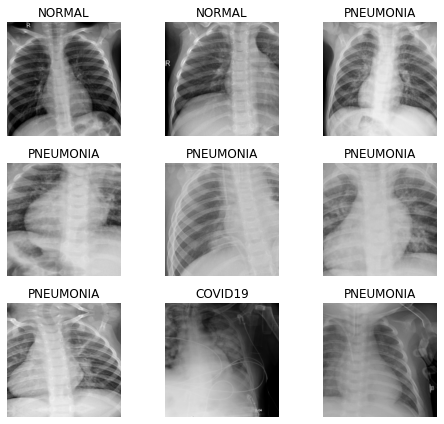

In [ ]:
data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)

## **Printing Classes present in the data**

---



In [ ]:
print(data.classes)
len(data.classes)
data.c

['COVID19', 'NORMAL', 'PNEUMONIA']


3

In [ ]:
data

ImageDataBunch;

Train: LabelList (4116 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: /dev/shm/Data/train;

Valid: LabelList (1028 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: /dev/shm/Data/train;

Test: None

## **Create Model**

---



In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


## **Finding Learning Rate(LR)**

---



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


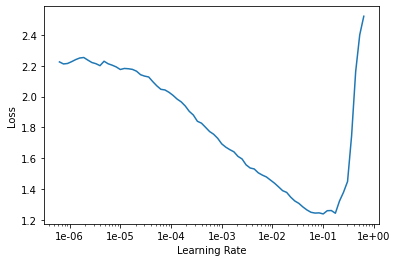

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

## **Training the Model**

---



In [ ]:
# Train the Model
lr1 = 1e-3  #-2 to -1 next time
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.677598,3.130544,0.838521,05:00
1,0.848588,1.304405,0.893969,04:59
2,0.455024,0.132928,0.966926,05:01
3,0.219255,0.144527,0.958171,04:58


In [ ]:
# lr1 = 1e-3
lr = 1e-2
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.099282,0.143734,0.961089,05:00
1,0.114542,0.206432,0.962062,05:00


epoch,train_loss,valid_loss,accuracy,time
0,0.099282,0.143734,0.961089,05:00
1,0.114542,0.206432,0.962062,05:00
2,0.103749,0.126533,0.967899,05:00
3,0.102867,0.142849,0.963035,04:50
4,0.081353,0.197606,0.963035,04:47


## **Hyper Parameter Tuning**

---


In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.recorder.plot_losses()

## **Interpret the results**

---









In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## **Prediction Using Trained Model**

---



In [ ]:
img = open_image('/dev/shm/Data/test/COVID19/COVID19(469).jpg')
print(learn.predict(img)[0])

## **Save and Load the Model**

---



In [ ]:
learn.export(file = Path("/kaggle/working/export.pkl"))
learn.model_dir = "/kaggle/working"
learn.save("stage-1",return_path=True)

## **Prediction with pth file**

In [ ]:
path1 = Path("") 
classes = ['COVID19', 'NORMAL', 'PNEUMONIA'] 
data2 = ImageDataBunch.single_from_classes(path1, classes, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats) 
learner = cnn_learner(data2, models.resnet50)

NameError: ignored

In [ ]:
learner.load('stage-1')

In [ ]:
#img = open_image(img_path)
img = open_image('/dev/shm/Data/test/COVID19/COVID19(469).jpg')
pred_class, pred_idx, outputs = learner.predict(img)
print(pred_class)